
# Project: Investigate a Dataset (TMDb Movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This Data set information contains about 10,000 movies collected from The Movie Database, we need to analyze it to respond to some questions like :
- The top 10 movies and its profit.
- number of movie production over years.
- the relation between the net profit and rating
- the relation between budget profit and rating
- the relation between budget profit and popularity
- the relation between popularity and net rating .
- the relation between runtime and rating.
- average runtime over years.
- Filmmaking production profit over years
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high profit?



In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
tmdb_df = pd.read_csv("tmdb-movies.csv")
tmdb_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_df.shape

(10866, 21)

In [4]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
tmdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
tmdb_df.drop(["id","imdb_id","homepage","tagline","overview","keywords"], axis =1 ,inplace = True)
tmdb_df.shape

(10866, 15)

In [8]:
#check for duplicated rows
sum(tmdb_df.duplicated())


1

In [9]:
#drop duplicated rows
tmdb_df.drop_duplicates(inplace = True)
tmdb_df.shape

(10865, 15)

In [10]:
#Fill Null value with zero 

tmdb_df.fillna(value = 0,inplace = True)
tmdb_df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
# convert data to date datatype
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])


In [12]:
# calculate the net profit and concat it to our data set

tmdb_df['net_profit'] = tmdb_df['revenue'] - tmdb_df['budget'] 
tmdb_df['net_profit_adj'] = tmdb_df['revenue_adj'] - tmdb_df['budget_adj']

In [13]:
##Maping genres and concat it to our data set

genres_df = (tmdb_df.genres.str.split("|",expand=True))

df1 = pd.DataFrame() 
for i in range(0, len(genres_df.columns), 1):
    df2 = pd.get_dummies(genres_df.iloc[:,i])
    df2.rename(columns=lambda x: x.strip().replace("%i_ ", ""), inplace=True)
    df1 = df1.add(df2, fill_value=0)

tmdb_df = pd.concat([tmdb_df, df1 ] , axis=1)
tmdb_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (The relation between the revenue and budget !)

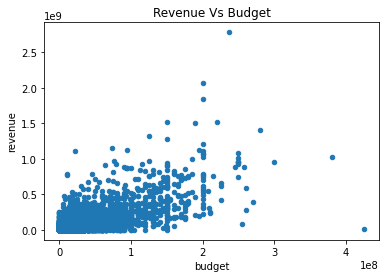

In [14]:
##The relation between the revenue and budget
tmdb_df.plot(y='revenue', x='budget', kind='scatter', title ="Revenue Vs Budget");


In [15]:
# A direct relationship regardless of the outliers.

### Research Question 2  (The top 10 movies!)

In [16]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

top10rated_df = tmdb_df.sort_values(by ='vote_average',ascending=False)
top10rated_df.query('(revenue !=0) & (budget != 0)' ,inplace = True)
top10rated_df.head(10)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
7948,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,1984-11-16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4178,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,1994-09-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7269,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
650,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10222,2.377288,22000000,321265768,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,195,Drama|History|War,Universal Pictures|Amblin Entertainment,1993-11-29,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4177,8.093754,8000000,213928762,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,154,Thriller|Crime,Miramax Films|A Band Apart|Jersey Films,1994-10-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2409,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4179,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,1994-07-06,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9758,3.264571,13000000,47542841,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,200,Drama|Crime,Paramount Pictures|The Coppola Company,1974-12-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2875,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'the profit of top 10 rated movies')

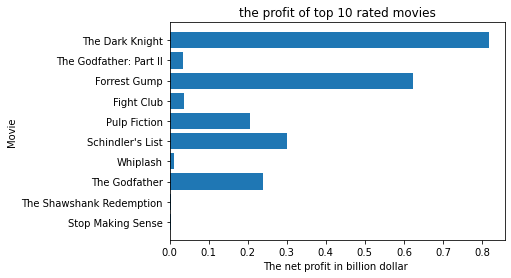

In [17]:
#the profit of top 10 rated movies

top10rated_df = top10rated_df.iloc[0:10,:]

plt.barh(y = top10rated_df['original_title'], width=top10rated_df['net_profit'].astype(int)/1000000000 )
plt.xlim(0)
plt.xlabel('The net profit in billion dollar ')
plt.ylabel('Movie')
plt.title('the profit of top 10 rated movies')

##top 10 rated movies It is not necessary a to be top 10 profit

In [18]:
##- The top 10 movies according to profit.

top10Profit_df = tmdb_df.sort_values(by ='net_profit',ascending=False)
top10Profit_df.query('revenue != 0' ,inplace = True)
top10Profit_df.head(10)



,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8094,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'The top 10 Net profit')

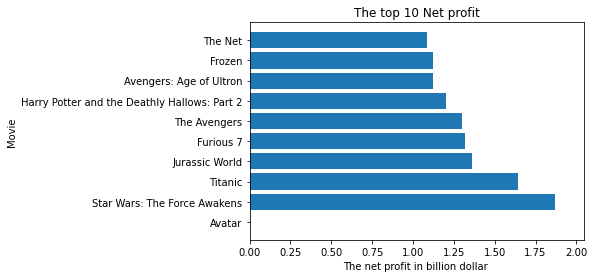

In [19]:

#The top 10 movies profit
top10Profit_df = top10Profit_df.iloc[0:10,:]

plt.barh(y = top10Profit_df['original_title'], width=top10Profit_df['net_profit'].astype(int)/1000000000 )
plt.xlim(0)
plt.xlabel('The net profit in billion dollar ')
plt.ylabel('Movie')
plt.title("The top 10 Net profit")

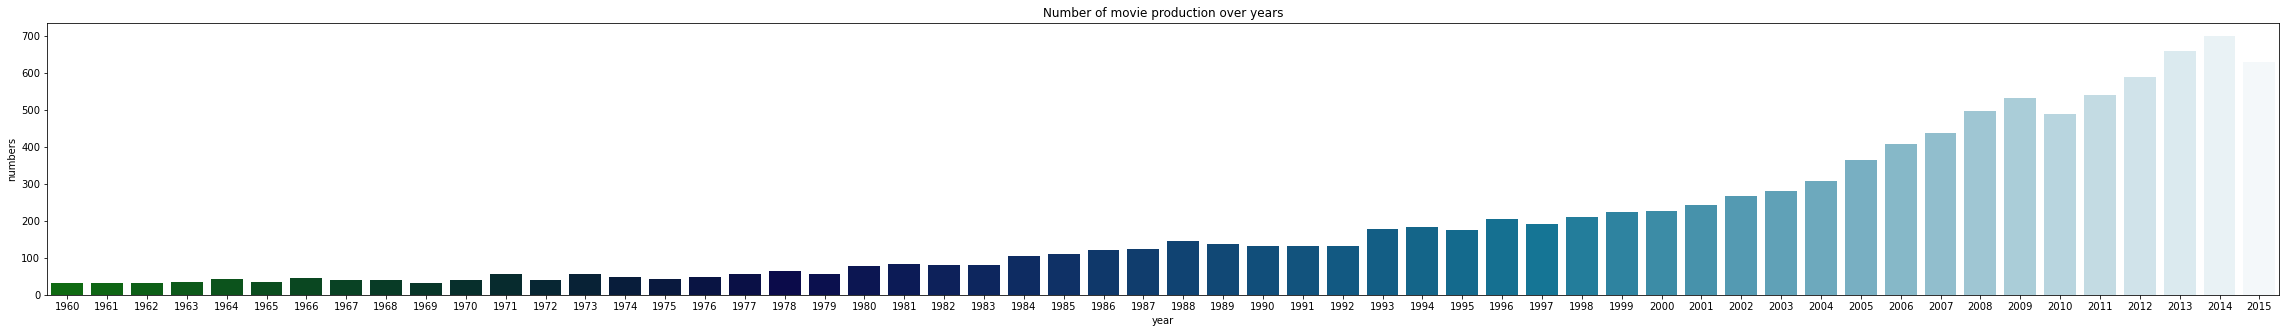

In [20]:
##Number of movie production over years.

plt.figure(figsize=(40,5))
sns.countplot(x=tmdb_df['release_year'],data=tmdb_df,palette='ocean')

plt.ylabel('numbers')
plt.xlabel('year')
plt.title("Number of movie production over years")
plt.show()

In [21]:
#Movies production growth through years

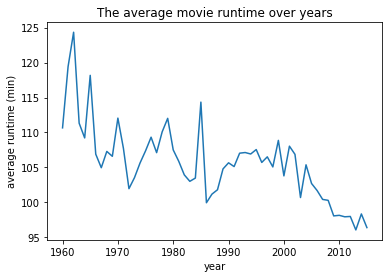

<Figure size 1440x360 with 0 Axes>

In [22]:
#average runtime over years
#tmdb_df.groupby(['release_year']).mean().runtime
plt.plot(tmdb_df.groupby(['release_year']).mean().runtime)
plt.ylabel('average runtime (min)')
plt.xlabel('year')
plt.title("The average movie runtime over years")
plt.figure(figsize=(20, 5))
plt.show()


##The duration of the films is decreased over years to settle now at about 95 minutes.

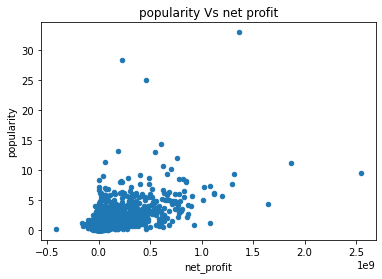

In [23]:
####- the relation between popularity and net profit .

tmdb_df.plot(y='popularity', x='net_profit', kind='scatter', title ="popularity Vs net profit");


In [24]:
##No correlation

<AxesSubplot:>

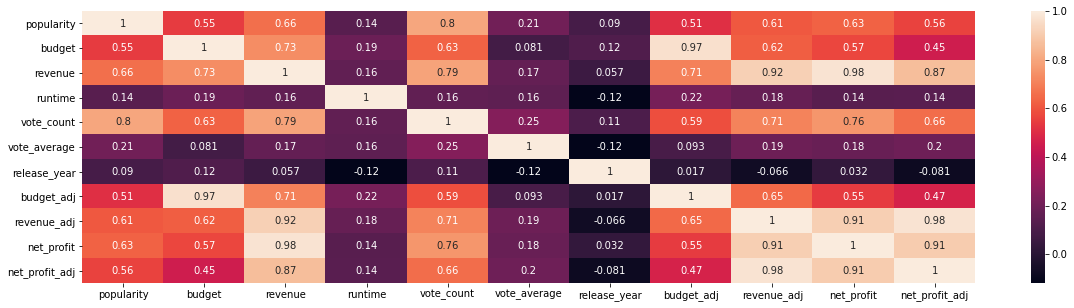

In [24]:
#correlation matrix
plt.figure(figsize=(20, 5))

sns.heatmap(tmdb_df.iloc[:,:-20].corr(),annot=True)


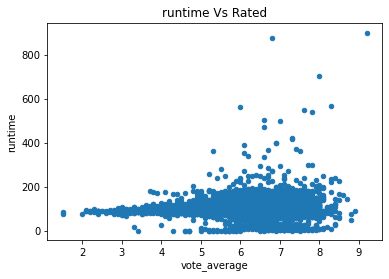

In [25]:
##the relation between runtime and net rating.


tmdb_df.plot(y='runtime', x='vote_average', kind='scatter', title ="runtime Vs Rated");


In [26]:
##No correlation

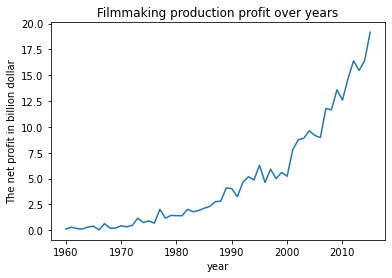

<Figure size 1440x360 with 0 Axes>

In [27]:
##Filmmaking production profit over years

plt.plot(tmdb_df.groupby(['release_year']).sum().net_profit/1000000000)
plt.ylabel('The net profit in billion dollar')
plt.xlabel('year')
plt.title("Filmmaking production profit over years")
plt.figure(figsize=(20, 5))
plt.show()

#The profit of movie production grows exponentially over the years this is obvious in the picture


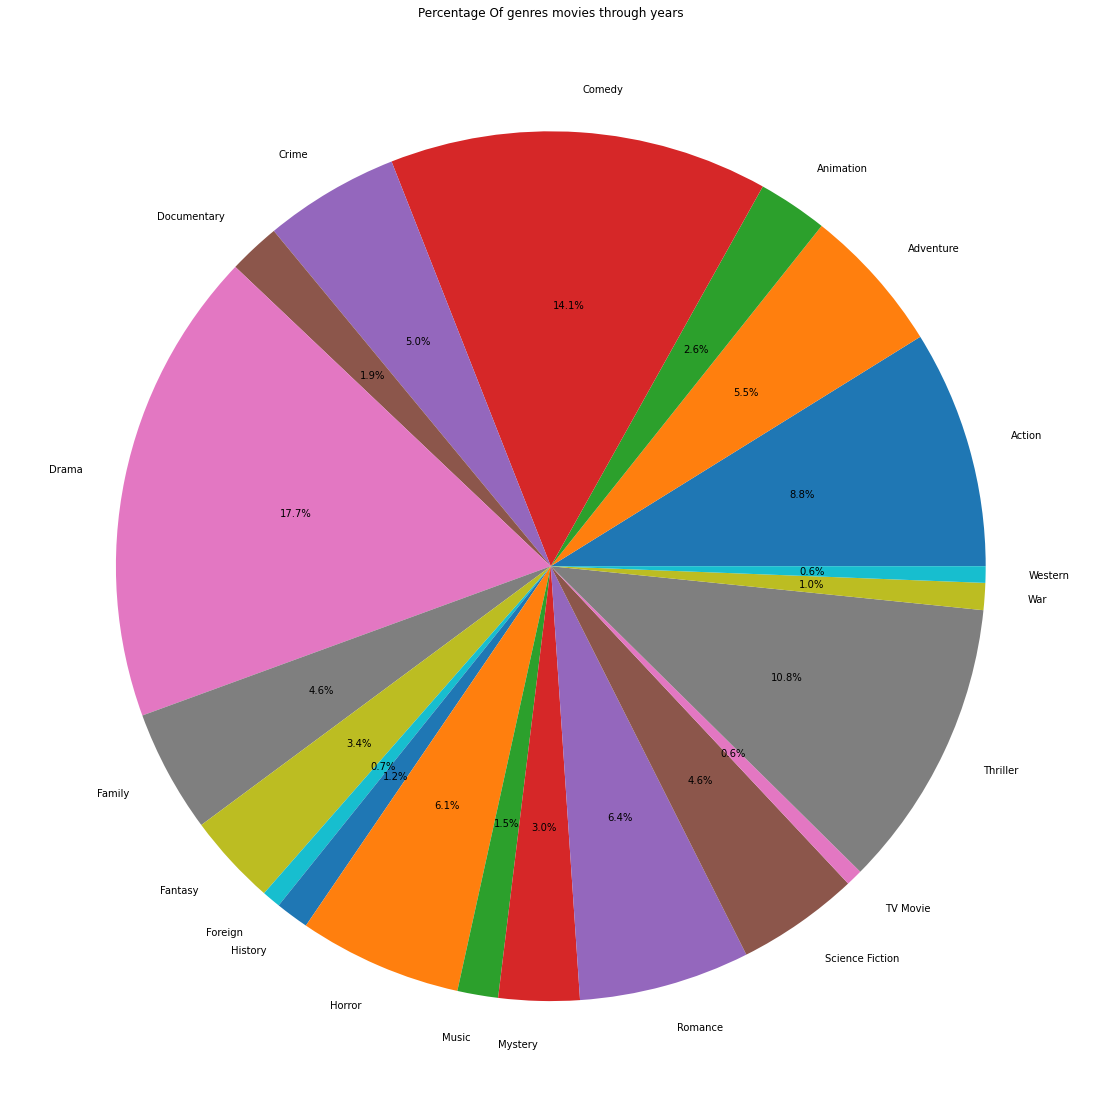

In [28]:
###Which genres are most popular from year to year?

genres = tmdb_df.groupby(['release_year']).sum().iloc[:,-20:]
                            
genres.sum().plot(kind="pie",figsize=(20,20),autopct="%1.1f%%")
plt.title("Percentage Of genres movies through years")
plt.ylabel('')
plt.show()

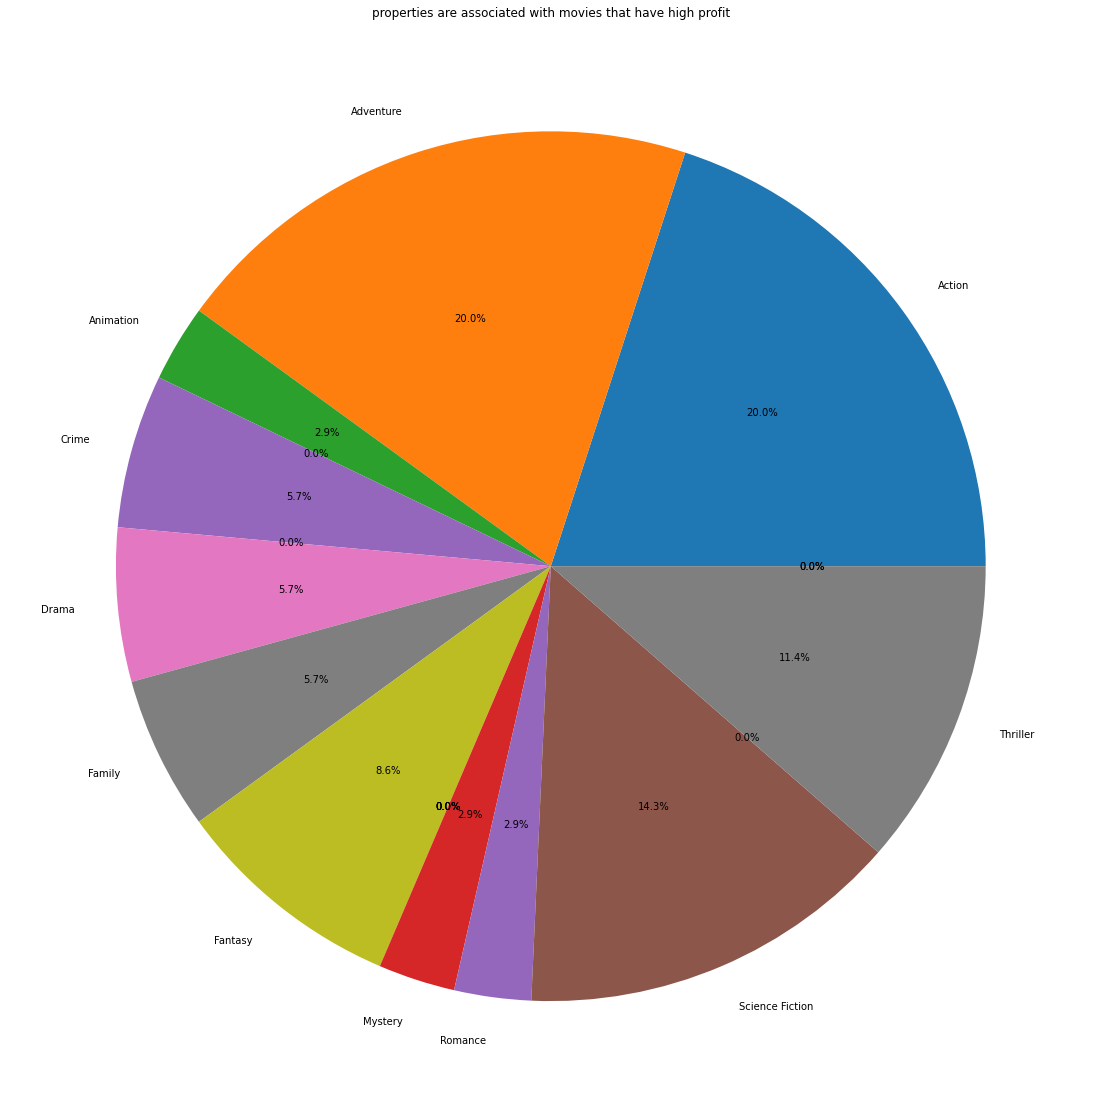

In [29]:
###- What kinds of properties are associated with movies that have high profit?

genres = top10Profit_df.groupby(['release_year']).sum().iloc[:,-20:]
                            
genres.sum().plot(kind="pie",figsize=(20,20),autopct="%1.1f%%")
plt.title("properties are associated with movies that have high profit")
plt.ylabel('')
plt.show()


<a id='conclusions'></a>
## Conclusions


from  Data exploratoration we found that :

1-Profit is directly proportional to budget.

2-The top 10 rated movies differ in their profit and some of them did not earn much.

3-The number of movie production grows exponentially over the years.

4-there is no correlation between vote rate and movie duration

5-the duration of the movie shrink through the years.

6-The profit of movie production grows exponentially over the years.

7-drama and comedy movies are the most produced through the years.

8-adventure and action movies are the most  earn high profit.


<a id='limitations'></a>
## limitations

1-zeros value in budget and revenue column lead to inaccurate analysis.

2-Diversity in popularity column can't make sense.

3-There is no correlation between and profit

4- outlier values

5-incorrect data type 



In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1